<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Generative AI for Business Applications</center></font>
<center><font size=6>Transformers for Text Generation - Week 1</center></font>

<center><img src="https://images.pexels.com/photos/3769532/pexels-photo-3769532.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="1300" height="500"></center>

<center><font size=6>Airline Customer Review Sentiment Analysis</center></font>

## Problem Statement

### Business Context

In today's digital age, social media platforms like Twitter have become a prominent channel for customers to share their experiences and opinions, and the airline industry is no exception. Passengers frequently turn to Twitter to express their thoughts, feelings, and experiences related to their air travel. The ease of access and immediacy of social media has empowered customers to voice their opinions in real-time, making it a valuable source of feedback for airlines. The airline company recognized the immense value of these insights to understand customer sentiment and continuously enhance the travel experience.

However, the airline company faces a significant challenge with the rise of negative feedback on social media. Negative sentiments expressed by customers become a crucial problem to solve as they can lead to several detrimental effects, including:

1. Customer Churn: Unaddressed negative sentiment can lead to customer dissatisfaction and ultimately result in passengers choosing competitors for their future travel needs. This translates to a loss of loyal customers, impacting long-term revenue and market share.

2. Reputation Damage: Persistent negative sentiment, if left unmanaged, can tarnish an airline's reputation, and influence potential passengers to avoid booking with the airline. A damaged reputation can have lasting consequences, affecting brand loyalty and trust.

3. Financial Loss: Loss of revenue can occur if negative sentiment drives passengers away, impacting the airline's profitability and long-term success. Negative feedback can discourage potential passengers from making bookings with the airline, leading to direct financial repercussions

### Problem Definition

The airline has noticed a trend as it grew - the amount of feedback coming through conventional channels (airline feedback forms, surveys, etc.) has reduced and customers have started sharing their feedback by tagging the airline's official social media handles. The volume of feedback being received on social media has significantly increased (~25%) over the past six months. In particular, the official Twitter handle of the airline saw a 50% increase in mentions. While they were initially tracking the social media feedback manually, the recent increase in volume has made it difficult to continue the same. This has prompted the airline to seek an AI-based solution to analyze the feedback provided by customers on social media. They believe that such a solution will be more effective than their current methods and provide insights that can proactively help them minimize revenue loss. As a first step, they want to start by assessing the feedback provided by customers on social media and categorizing the sentiment of the customer as negative, positive, or neutral.

As a Data Scientist on the airline's Data Team, you are provided with the tweets shared by customers regarding their experience with the airline's services. The objective is to analyze the data and build a predictive model that can parse the customer reviews and predict the sentiment of the customer.

### Data Dictionary

* tweet_id - A unique identifier for each tweet                                                          
* airline_sentiment - The sentiment label of the tweet, such as positive, negative, or neutral                                               
* text - The actual text content of the tweet.

## Importing the necessary libraries

In [2]:
# installing necessary libraries
!pip install --quiet transformers==4.54.0 \
                     bitsandbytes==0.46.1 \
                     accelerate==1.9.0

ERROR: Could not find a version that satisfies the requirement bitsandbytes==0.46.1 (from versions: 0.31.8, 0.32.0, 0.32.1, 0.32.2, 0.32.3, 0.33.0, 0.33.1, 0.34.0, 0.35.0, 0.35.1, 0.35.2, 0.35.3, 0.35.4, 0.36.0, 0.36.0.post1, 0.36.0.post2, 0.37.0, 0.37.1, 0.37.2, 0.38.0, 0.38.0.post1, 0.38.0.post2, 0.38.1, 0.39.0, 0.39.1, 0.40.0, 0.40.0.post1, 0.40.0.post2, 0.40.0.post3, 0.40.0.post4, 0.40.1, 0.40.1.post1, 0.40.2, 0.41.0, 0.41.1, 0.41.2, 0.41.2.post1, 0.41.2.post2, 0.41.3, 0.41.3.post1, 0.41.3.post2, 0.42.0)
ERROR: No matching distribution found for bitsandbytes==0.46.1


Note:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

**Prompt**:

<font size=3 color="#4682B4"><b>I want to analyze the provided CSV data and build a Sentiment Analysis using language model from Hugging Face Transformers. Import the necessary Python libraries to:

1. Read and manipulate the data
2. Load the language model using AutoModelForSeq2SeqLM and AutoTokenizer
3. Visualise the data
4. Suppress unnecessary warnings for a cleaner output

</font>

In [3]:
# importing libraries for data manipulation
import numpy as np
import pandas as pd

# importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# function for splitting the data
from sklearn.model_selection import train_test_split

# function for loading the model
from transformers import  AutoTokenizer , AutoModelForSeq2SeqLM

# importing metric functions
from sklearn.metrics import confusion_matrix, accuracy_score

/Users/alexanderhearnz/codebase/PGP-GABA/jupyter_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Loading the dataset

***Prompt***:

<font size=3 color="#4682B4"><b> Mount the Google Drive
</font>

In [ ]:
# # mounting Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

***Prompt***:

<font size=3 color="#4682B4"><b> Load the CSV file named "US_Airways" and store it in the variable data.
</font>

In [4]:
# loading the dataset
data = pd.read_csv('../data/US_Airways.csv')

## Data Overview

***Prompt***:

<font size=3 color="#4682B4"><b> Display the first 5 rows of the `data`.
</font>

In [5]:
# Print first 5 rows of data
data.head()

,tweet_id,airline_sentiment,text
0,5.703106e+17,negative,@USAirways is there a better time to call? My...
1,5.703101e+17,negative,@USAirways and when will one of these agents b...
2,5.703093e+17,neutral,@USAirways is a DM possible if you aren't foll...
3,5.703090e+17,neutral,@USAirways Fortunately you have staff like Lyn...
4,5.703088e+17,negative,@USAirways just hung up on me again. Another ...


***Prompt***:

<font size=3 color="#4682B4"><b> Display the number of rows and columns in the `data`.
</font>

In [6]:
# print shape of data
data.shape

(2913, 3)

* The data comprises of ~3k customer reviews

***Prompt***:

<font size=3 color="#4682B4"><b> Display the missing values.
</font>

In [7]:
# Check for NULL values
data.isnull().sum()

tweet_id             0
airline_sentiment    0
text                 0
dtype: int64

* There are missing values across multiple columns

## Exploratory Data Analysis (EDA)


### Univariate Analysis

***Prompt***:

<font size=3 color="#4682B4"><b> Visualise the percentage distribution of sentiments in the reviews.

</font>

/var/folders/t1/m6dx844s77gcn0m2bfbk8xmm0000gn/T/ipykernel_76038/1370562234.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_percentages.index, y=sentiment_percentages.values, palette='viridis')


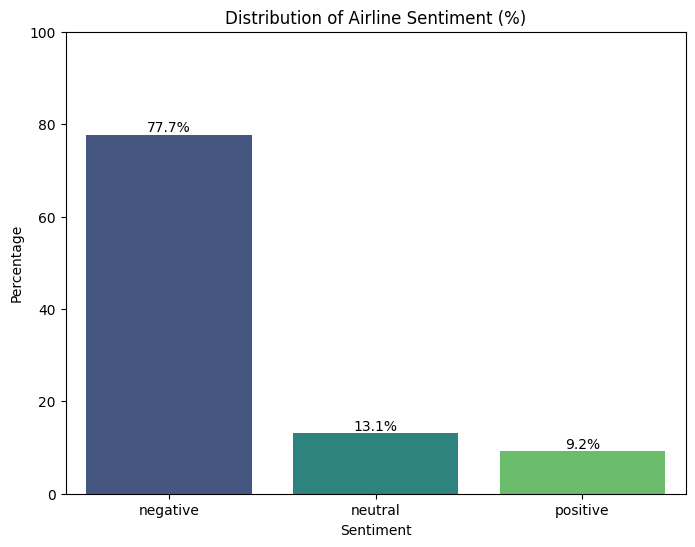

In [8]:
# Calculate sentiment percentages
sentiment_counts = data['airline_sentiment'].value_counts()
sentiment_percentages = sentiment_counts / len(data) * 100

# Visualize the sentiment distribution as percentages
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sentiment_percentages.index, y=sentiment_percentages.values, palette='viridis')
plt.title('Distribution of Airline Sentiment (%)')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.ylim(0, 100)

# Add percentage labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

- Majority of the tweets are negative (78%), followed by neutral tweets (13%), and then the positive tweets (9%)

## Model Loading and Evaluation

In practice, we **generally do not create transformer models from scratch** as

1. creating transformer models from scratch is computationally demanding and requires substantial processing power
2. training a transformer model from scratch demands large, labeled datasets, which can be challenging to obtain

**We use pre-trained transformer models for most common applications.**

We'll be using the **Google FLAN-T5** model here.

💡 **FLAN-T5, developed by Google Research, is a "Fine-tuned LAnguage Net" (FLAN) with "Text-To-Text Transfer Transformer" (T-5) architecture.**

📊 **FLAN-T5 excels in various NLP tasks**, including translation, classification, and question answering, and it's known for its speed and efficiency.

📋 FLAN-T5 comes in different sizes: small, base, large, XL, and XXL, offering customization options.

🛠️ Potential use-cases include text generation, classification, summarization, sentiment analysis, question-answering, translation, and chatbots.

**NOTE**: We use 8-bit loading to reduce memory usage and speed up model inference without significantly affecting performance.

***Prompt***:

<font size=3 color="#4682B4"><b> Load the `google/flan-t5-large` from hugging face using 8-bit quantization.

</font>

In [10]:
import torch

model_name = "google/flan-t5-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Check if CUDA is available, otherwise use CPU
device = "cuda" if torch.cuda.is_available() else "cpu"

if torch.cuda.is_available():
	# Use 8-bit quantization only if CUDA is available
	model = AutoModelForSeq2SeqLM.from_pretrained(
		model_name,
		device_map="auto",
		load_in_8bit=True
	)
else:
	# Fallback to CPU without quantization
	model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
	model = model.to(device)

The parameters used in the code are generated based on the LLM, but you can experiment with different parameters and values. For more details, refer to the official documentation:

* [Tokenizer documentation](https://huggingface.co/docs/transformers/en/main_classes/tokenizer)
* [Model documentation](https://huggingface.co/docs/transformers/en/main_classes/model)

***Prompt***:

<font size=3 color="#4682B4"><b>Create a function that takes an prompt as input and returns models output.

</font>

In [17]:
# defining a function to generate, process, and return the response
def generate_response(prompt):
    input_ids = tokenizer(prompt, return_tensors="pt", max_length=512, truncation=True).to(device)    ### using the tokenizer to create tokens in tensor format from an input and move to the appropriate device
    outputs = model.generate(input_ids["input_ids"], max_length=300, do_sample=True, temperature=0.001)  ### generating the model output in tensor format
    return tokenizer.decode(outputs[0])[6:-4]    ### using the tokenizer to decode the model output, and then return it

In the `generate()` function defined above, the following arguments were used:

1. `max_length`: This parameter determines the maximum length of the generated sequence. In the provided code, max_length is set to 300, which means the generated sequence should not exceed 300 tokens.

2. `temperature`: The temperature parameter controls the level of randomness in the generation process. A higher temperature (e.g., closer to 1) makes the output more diverse and creative but potentially less focused, while a lower temperature (e.g., close to 0) produces more deterministic and focused but potentially repetitive outputs. In the code, temperature is set to 0.001, indicating a very low temperature and, consequently, a more deterministic sampling.

3. `do_sample`: This is a boolean parameter that determines whether to use sampling during generation (do_sample=True) or use greedy decoding (do_sample=False). When set to True, as in the provided code, the model samples from the distribution of predicted tokens at each step, introducing randomness in the generation process.

***Prompt***:

<font size=3 color="#4682B4"><b>Retrieve and display the review and its actual sentiment at the fourth position in the dataset.

</font>

In [18]:
# checking a customer review and it's sentiment
print('Review:\t', data['text'][4])
print('Actual Sentiment:\t', data['airline_sentiment'][4])

Review:	 @USAirways just hung up on me again.  Another waste of an hour of my time.  How am I supposed to book a one way award flight?  #badwebsite
Actual Sentiment:	 negative


<font size=3 color="#4682B4"><b>Creating a prompt that instructs the model on the task to perform.

</font>

In [19]:
sys_prompt = """
    Categorize the sentiment of the customer review as positive, negative, or neutral.
    Leverage your expertise in the aviation industry and deep understanding of industry trends to analyze the nuanced expressions and overall tone.
    It is crucial to accurately identify neutral sentiments, which may indicate a balanced view or neutral stance towards Us Airways. Neutral expressions could involve factual statements without explicit positive or negative opinions.
    Consider the importance of these neutral sentiments in gauging the public sentiment towards the airline company.
    For instance, a positive sentiment might convey satisfaction with the airline's services, a negative sentiment could express dissatisfaction, while neutral sentiment may reflect an impartial observation or a neutral standpoint
"""

***Prompt***:

<font size=3 color="#4682B4"><b>Use the defined system prompt to predict the sentiment of the fourth instance in the dataset.

</font>

In [20]:
# predicting the sentiment using the model by incorporating the system prompt and the provided review text

pred_sent = generate_response(
    """
        {}
        Review text: '{}'
    """.format(sys_prompt, data['text'][4])
)

print(pred_sent)

negative


- The model was able to correctly identify the sentiment here

**Note**: We'll discuss more about prompts, types of prompts, and how to effectively write them to optimize LLM outputs in upcoming classes.

***Prompt***:

<font size=3 color="#4682B4"><b>Create a function that accepts a review text as input and returns its predicted sentiment.

</font>

In [21]:
# defining a function to generate a sentiment prediction
def predict_sentiment(review_text):
    pred = generate_response(
        """
            {}
            Review text: '{}'
        """.format(sys_prompt, review_text)
    )

    return pred

***Prompt***:

<font size=3 color="#4682B4"><b>Generate sentiment predictions for each review in the dataset and store the results in a new column called `predicted_sentiment`.


</font>

In [22]:
predicted_sentiment = [predict_sentiment(item) for item in data['text'].values]
data['predicted_sentiment']=predicted_sentiment

## Model Evaluation

***Prompt***:

<font size=3 color="#4682B4"><b>Generate a confusion matrix to compare the predicted sentiments with the actual airline sentiments in the dataset.



</font>

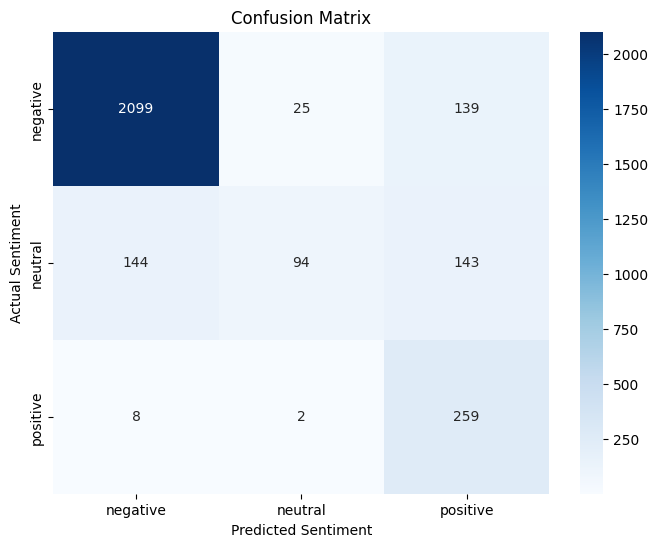

In [23]:
# Generate the confusion matrix
cm = confusion_matrix(data['airline_sentiment'], data['predicted_sentiment'])

# Get the unique sentiment labels
labels = data['airline_sentiment'].unique()

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Confusion Matrix')
plt.show()

***Prompt***:

<font size=3 color="#4682B4"><b>Calculate the accuracy by comparing the `predicted_sentiment` column with the actual `airline_sentiment` column in the dataset.


</font>

In [24]:
# Calculate the accuracy
accuracy = accuracy_score(data['airline_sentiment'], data['predicted_sentiment'])

# Display the accuracy
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84


- The accuracy of the model is ~84%


There is an interesting observation from the confusion matrices above.

- The model is not able to correctly capture the nuances of neutral sentiments for quite a few customers
- This deficiency has the potential to introduce misinformation into decision-making processes, potentially distorting analytics and strategic planning. Such inaccuracies could, in turn, impact the services offered and the effectiveness of engagement strategies


We have two options to deal with the situation.

1. We can try out a different transformer-based model
2. We can improve the performance of this model for this task

There are two approaches to improving the performance of the model here.

1. **Fine-tuning the Model**
2. **Prompt Engineering**

We'll learn more about both these approaches in the upcoming classes.

## Conclusion

- We analyzed the distribution of negative reasons and identified customer service issues and late flights as the predominant factors driving negative sentiments

- We processed the text data to analyze it and gain insights into what could have resulted in negative and positive customer experiences through word clouds

- We used the Google FLAN-T5 model to build a sentiment analyzer that achieved ~84% accuracy

- The model, however, was unable to capture the nuances of neutral sentiments well enough to make accurate predictions in those cases

- Once we improve the performance of the model, we can use the model to make informed decisions to enhance the services provided by the airline to offer a better customer experience

<font size=6 color="#4682B4">Power Ahead!</font>
___